### 实现一维卷积神经网络

#### 准备 IMDB 数据

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


#### 在 IMDB 数据上训练并评估一个简单的一维卷积神经网络

In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer=RMSprop(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 528us/step - loss: 0.8337 - acc: 0.5091 - val_loss: 0.6874 - val_acc: 0.5648
Epoch 2/10
20000/20000 [==============================] - 3s 136us/step - loss: 0.6700 - acc: 0.6396 - val_loss: 0.6642 - val_acc: 0.6580: 0.6722 - acc:
Epoch 3/10
20000/20000 [==============================] - 3s 137us/step - loss: 0.6237 - acc: 0.7523 - val_loss: 0.6082 - val_acc: 0.7432
Epoch 4/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.5261 - acc: 0.8083 - val_loss: 0.4831 - val_acc: 0.8058
Epoch 5/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.4133 - acc: 0.8477 - val_loss: 0.4275 - val_acc: 0.8326
Epoch 6/10
20000/20000 [==============================] - 3s 140us/step - loss: 0.3493 - acc: 0.8659 - val_loss: 0.4161 - val_acc: 0.8344
Epoch 7/10
20000/20000 [==============================] - 3s 140us/step - loss: 0.3127 - acc: 0.8595 - val_

#### 绘制结果

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

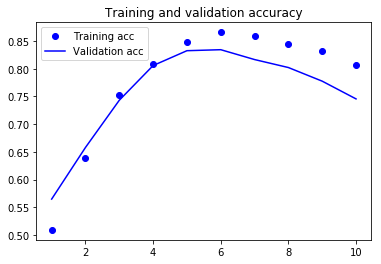

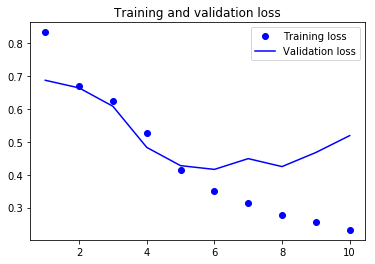

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 结合 CNN 和 RNN 来处理长序列

#### 在耶拿数据上训练并评估一个简单的一维卷积神经网络

In [6]:
%reload_ext autoreload
%autoreload 2

import jena_climate as jc

In [7]:
# 载入数据
float_data = jc.load_data('data/jena_climate/jena_climate_2009_2016.csv')
train_gen, val_gen, test_gen = jc.data_gen(float_data)

lookback = 1440
batch_size = 128

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', 
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total para

In [9]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 13s 27ms/step - loss: 0.4194 - val_loss: 0.4361
Epoch 2/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3658 - val_loss: 0.4404
Epoch 3/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3406 - val_loss: 0.4479
Epoch 4/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3246 - val_loss: 0.4683
Epoch 5/20
500/500 [==============================] - 12s 25ms/step - loss: 0.3129 - val_loss: 0.5061
Epoch 6/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2990 - val_loss: 0.4886
Epoch 7/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2909 - val_loss: 0.4996
Epoch 8/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2854 - val_loss: 0.5177
Epoch 9/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2790 - val_loss: 0.4867
Epoch 10/20
500/500 [==============================] - 12s 24ms/step - loss: 0.275

#### 绘制结果

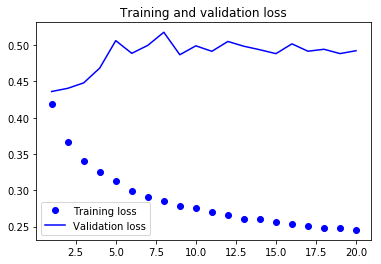

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 为耶拿数据集准备更高分辨率的数据生成器

In [12]:
step = 3
lookback= 720
delay = 144

train_gen = jc.generator(float_data,
                         lookback=lookback,
                         delay=delay,
                         min_index=0,
                         max_index=200000,
                         shuffle=True,
                         step=step)
val_gen = jc.generator(float_data,
                       lookback=lookback,
                       delay=delay,
                       min_index=200001,
                       max_index=300000,
                       step=step)
test_gen = jc.generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=300001,
                        max_index=None,
                        step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

#### 结合一维卷积基和 GRU 层的模型

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 13,697
Trainable params: 13,697
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 79s 157ms/step - loss: 0.3415 - val_loss: 0.2818
Epoch 2/20
500/500 [==============================] - 78s 155ms/step - loss: 0.3083 - val_loss: 0.2758
Epoch 3/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2953 - val_loss: 0.2838
Epoch 4/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2871 - val_loss: 0.2833
Epoch 5/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2801 - val_loss: 0.2823
Epoch 6/20
500/500 [==============================] - 78s 156ms/step - loss: 0.2732 - val_loss: 0.2758
Epoch 7/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2679 - val_loss: 0.2764
Epoch 8/20
500/500 [==============================] - 78s 155ms/step - loss: 0.2629 - val_loss: 0.2726
Epoch 9/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2588 - val_loss: 0.2745
Epoch 10/20
500/500 [==============================] - 77s 154ms/step - l

#### 绘制结果

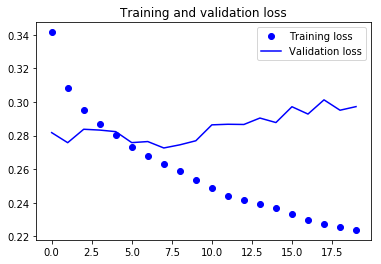

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()